

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [6]:
import sys

print("Python interpreter path:", sys.executable)

Python interpreter path: /usr/local/bin/python3


In [7]:
# your code here
# use many cells if you like to structure your code well


from IPython.display import IFrame

IFrame("https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&gid=1#gid=1",800,400)


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [71]:
# your code here
# use many cells if you like to structure your code well

import pandas as pd
df = pd.read_csv('TOTAL CASUALTIES.csv',header=1)

df.head()

d = df.loc[0]

mydict = {k:d[k] for k in df.columns}
print(mydict)


{'Year': np.float64(2004.0), 'Month': 'January', 'Taliban': '15', 'Civilians': '51', 'Afghan forces': '23', 'Nato (detailed in spreadsheet)': nan, 'Nato - official figures': np.float64(11.0)}


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

In [96]:
import seaborn as sns

df.dropna(subset=['Year'], inplace=True)

df.info()
df['Civilians'] = df['Civilians'].astype(float)
df['Taliban'] = df['Taliban'].astype(float)
df['Afghan forces'] = df['Afghan forces'].astype(float)
df['Nato (detailed in spreadsheet)'] = df['Nato (detailed in spreadsheet)'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     float64
 1   Month                           72 non-null     object 
 2   Taliban                         71 non-null     float64
 3   Civilians                       72 non-null     float64
 4   Afghan forces                   70 non-null     float64
 5   Nato (detailed in spreadsheet)  66 non-null     float64
 6   Nato - official figures         72 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.5+ KB


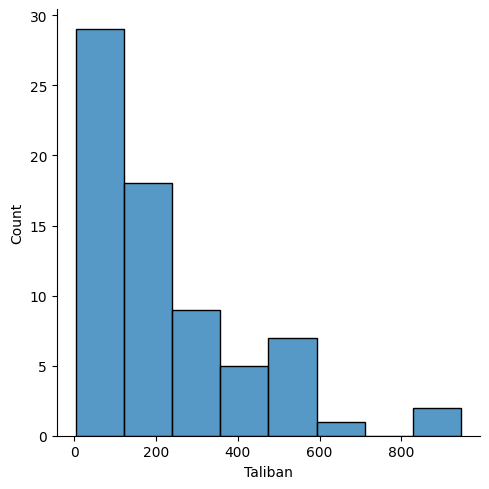

In [100]:
# your code here
# use many cells if you like to structure your code well

_ = sns.displot(df['Taliban'], kde=False)


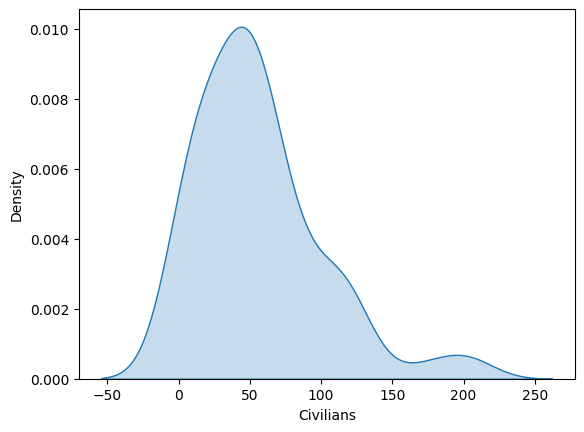

In [99]:
_ = sns.kdeplot(df['Civilians'],fill=True)

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [133]:
# your code here
# use many cells if you like to structure your code well


for index,row in df.iterrows():
    print(row['Taliban'])



15.0
nan
19.0
5.0
18.0
163.0
21.0
20.0
33.0
13.0
21.0
15.0
6.0
14.0
38.0
118.0
113.0
143.0
75.0
90.0
89.0
122.0
36.0
48.0
26.0
12.0
36.0
52.0
85.0
295.0
220.0
161.0
945.0
333.0
325.0
216.0
125.0
152.0
76.0
166.0
199.0
564.0
485.0
551.0
917.0
462.0
270.0
172.0
86.0
139.0
90.0
128.0
177.0
306.0
303.0
326.0
142.0
485.0
479.0
223.0
185.0
209.0
202.0
240.0
406.0
526.0
557.0
445.0
614.0
462.0
410.0
287.0


In [135]:
shortlist = []

for index,row in df.iterrows():
    if row['Taliban'] > 50:
        shortlist.append(row['Taliban'])

print(shortlist)


[163.0, 118.0, 113.0, 143.0, 75.0, 90.0, 89.0, 122.0, 52.0, 85.0, 295.0, 220.0, 161.0, 945.0, 333.0, 325.0, 216.0, 125.0, 152.0, 76.0, 166.0, 199.0, 564.0, 485.0, 551.0, 917.0, 462.0, 270.0, 172.0, 86.0, 139.0, 90.0, 128.0, 177.0, 306.0, 303.0, 326.0, 142.0, 485.0, 479.0, 223.0, 185.0, 209.0, 202.0, 240.0, 406.0, 526.0, 557.0, 445.0, 614.0, 462.0, 410.0, 287.0]


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [141]:
civilians  = []
afghan_forces = []


for index,row in df.iterrows():
    civilians.append(row['Civilians'])
    afghan_forces.append(row['Afghan forces'])

print(civilians)
print(afghan_forces)

df1 = df
del df1['Taliban']
del df1['Nato (detailed in spreadsheet)']
del df1['Nato - official figures']
print(df1)

[51.0, 7.0, 2.0, 3.0, 29.0, 32.0, 19.0, 26.0, 4.0, 14.0, 19.0, 13.0, 4.0, 4.0, 18.0, 5.0, 49.0, 31.0, 5.0, 6.0, 12.0, 15.0, 13.0, 16.0, 93.0, 54.0, 37.0, 33.0, 54.0, 71.0, 64.0, 101.0, 172.0, 44.0, 46.0, 51.0, 53.0, 33.0, 48.0, 123.0, 71.0, 80.0, 83.0, 65.0, 64.0, 46.0, 60.0, 37.0, 43.0, 120.0, 41.0, 55.0, 54.0, 51.0, 120.0, 46.0, 63.0, 56.0, 78.0, 76.0, 31.0, 46.0, 64.0, 44.0, 109.0, 111.0, 119.0, 206.0, 197.0, 107.0, 120.0, 87.0]
[23.0, 4.0, nan, 19.0, 56.0, 14.0, 19.0, 10.0, 16.0, 14.0, 36.0, 7.0, 27.0, nan, 2.0, 4.0, 25.0, 4.0, 29.0, 10.0, 29.0, 10.0, 24.0, 16.0, 14.0, 106.0, 61.0, 43.0, 50.0, 39.0, 36.0, 42.0, 97.0, 70.0, 14.0, 36.0, 49.0, 35.0, 48.0, 68.0, 125.0, 98.0, 114.0, 89.0, 144.0, 75.0, 67.0, 55.0, 48.0, 35.0, 19.0, 86.0, 65.0, 58.0, 100.0, 61.0, 57.0, 54.0, 68.0, 52.0, 34.0, 69.0, 94.0, 73.0, 118.0, 133.0, 80.0, 190.0, 133.0, 86.0, 69.0, 65.0]
    level_0  index    Year      Month  Civilians  Afghan forces
0         0      0  2004.0    January       51.0           23.0
1

In [198]:
import matplotlib.pyplot as plt

df1=df1.fillna(0)
df2 = df1

df2['Total'] = df2['Civilians'] + df2['Afghan forces']
df2['axis'] = df2['Year'].astype(str) +  df2['Month']

print(df2)

    level_0  index    Year      Month  Civilians  Afghan forces  Total  \
0         0      0  2004.0    January       51.0           23.0   74.0   
1         1      1  2004.0   February        7.0            4.0   11.0   
2         2      2  2004.0      March        2.0            0.0    2.0   
3         3      3  2004.0      April        3.0           19.0   22.0   
4         4      4  2004.0        May       29.0           56.0   85.0   
..      ...    ...     ...        ...        ...            ...    ...   
67       67     67  2009.0     August      206.0          190.0  396.0   
68       68     68  2009.0  September      197.0          133.0  330.0   
69       69     69  2009.0    October      107.0           86.0  193.0   
70       70     70  2009.0   November      120.0           69.0  189.0   
71       71     71  2009.0   December       87.0           65.0  152.0   

               axis  
0     2004.0January  
1    2004.0February  
2       2004.0March  
3       2004.0April  
4

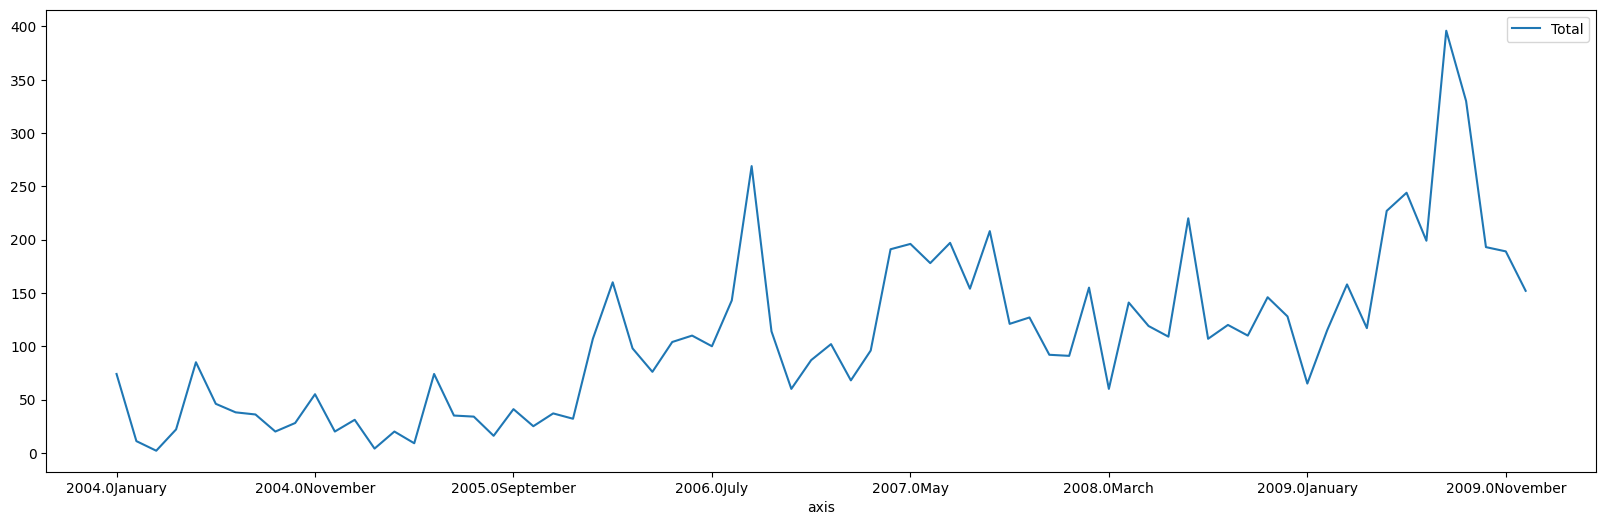

In [199]:
df2.plot(x='axis', y='Total', figsize=(20, 6))

plt.show()

<Axes: ylabel='axis'>

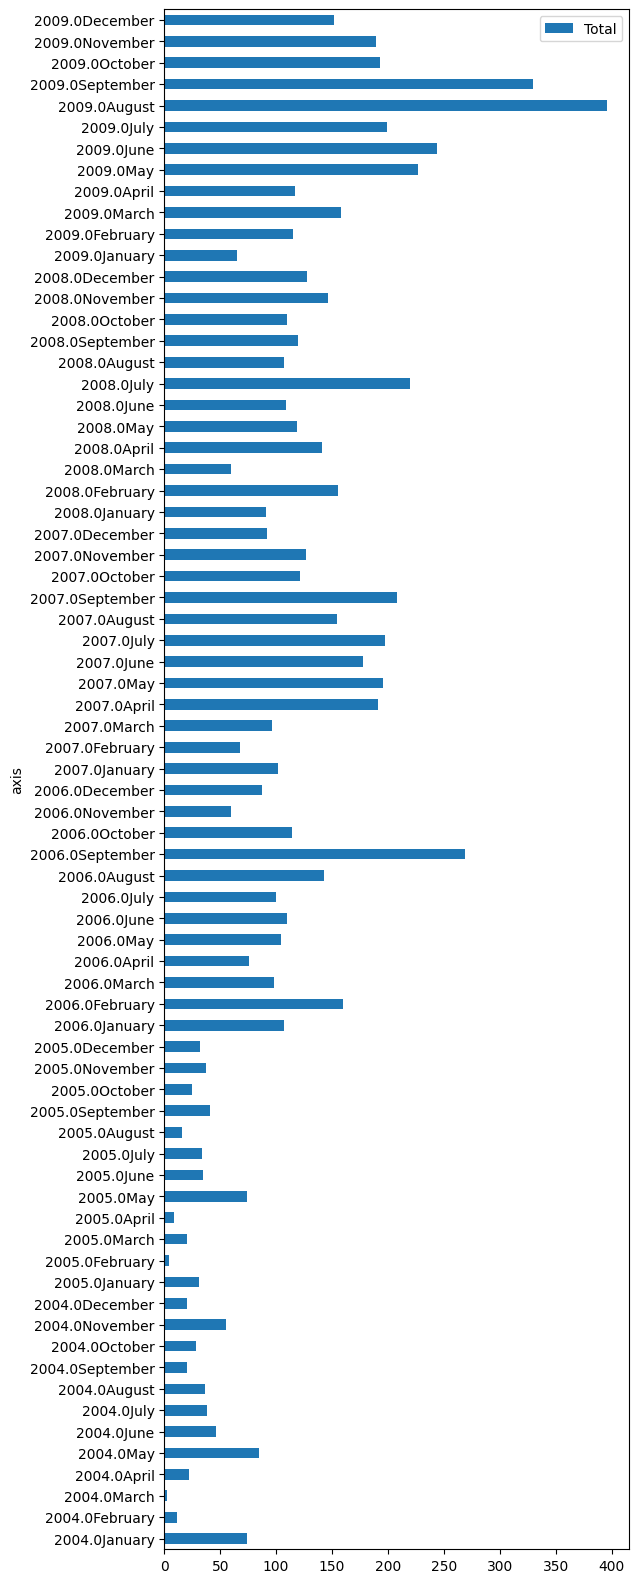

In [194]:
df2.plot(x='axis', y='Total', kind='barh',figsize=(6, 20))